In [ ]:
#df = pd.read_csv('C:/Users/leesh/Desktop/BA/Notebooks/results_summary/results_(m)_BU_1_to_1000_(01.08)/boxplot_data.csv')

Spaltennamen in der CSV-Datei: Index(['k', 'classifier', 'metric', 'median', 'q1', 'q3', 'min', 'max'], dtype='object')


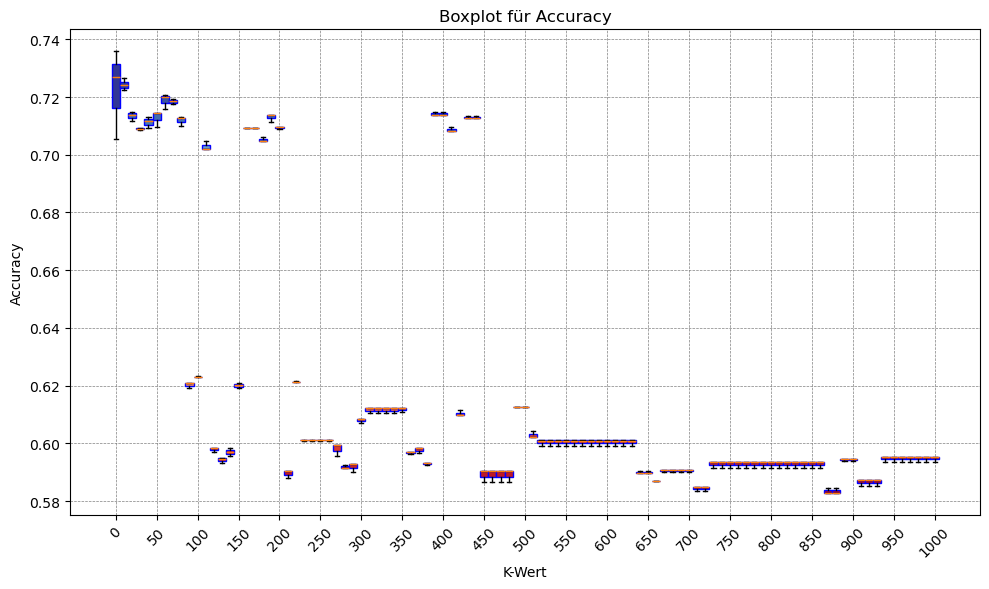

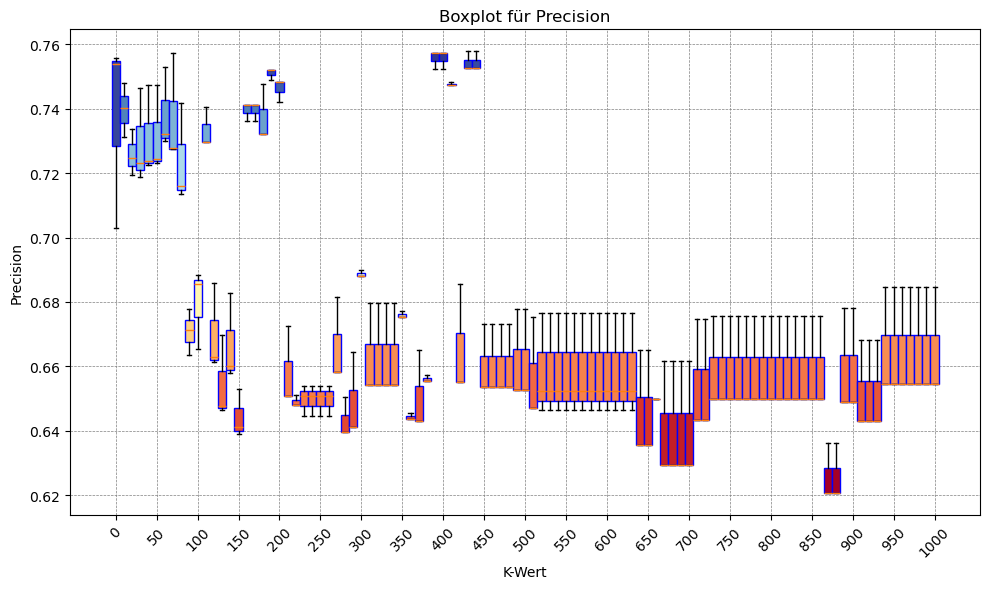

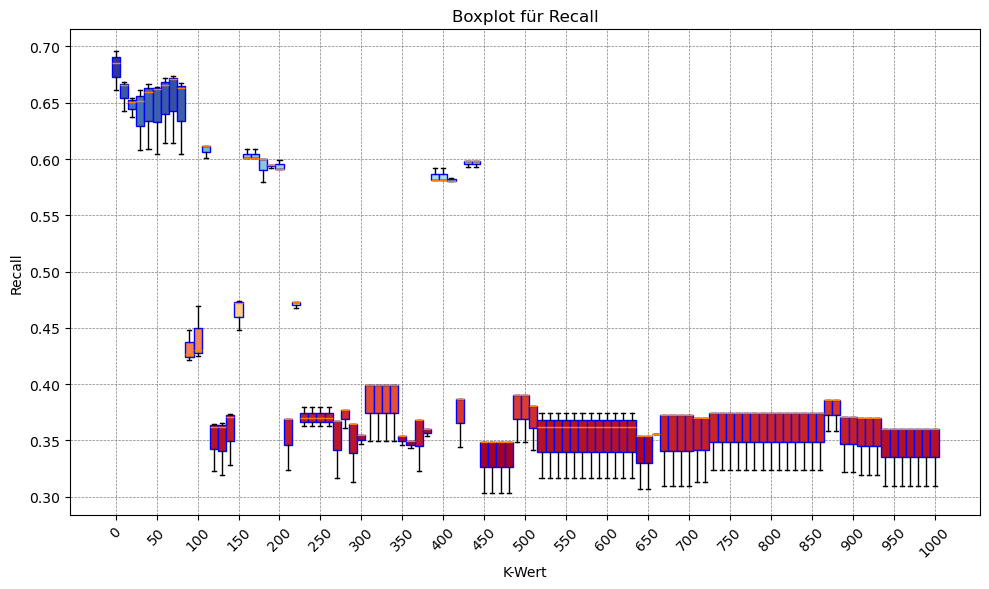

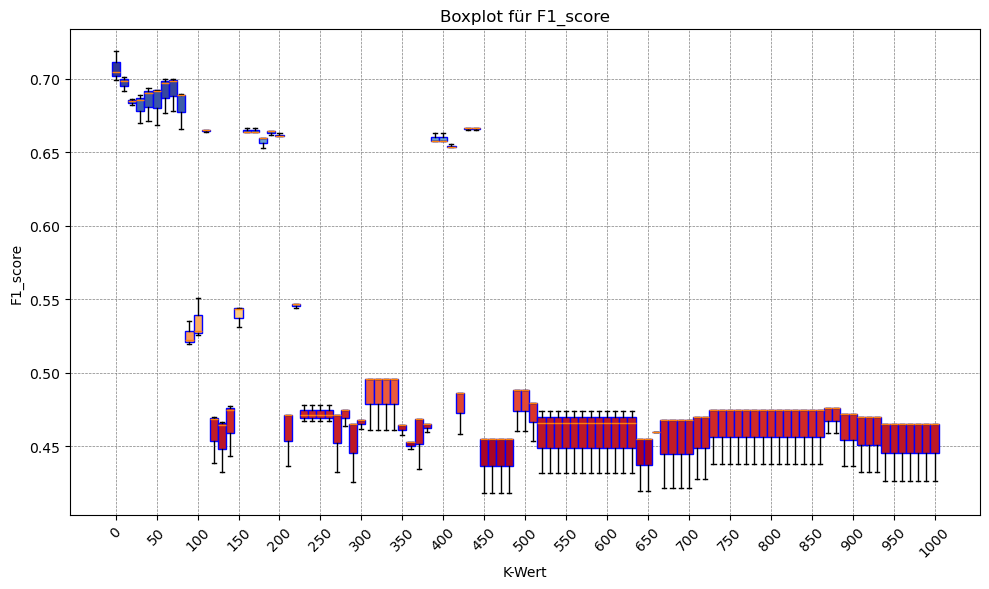

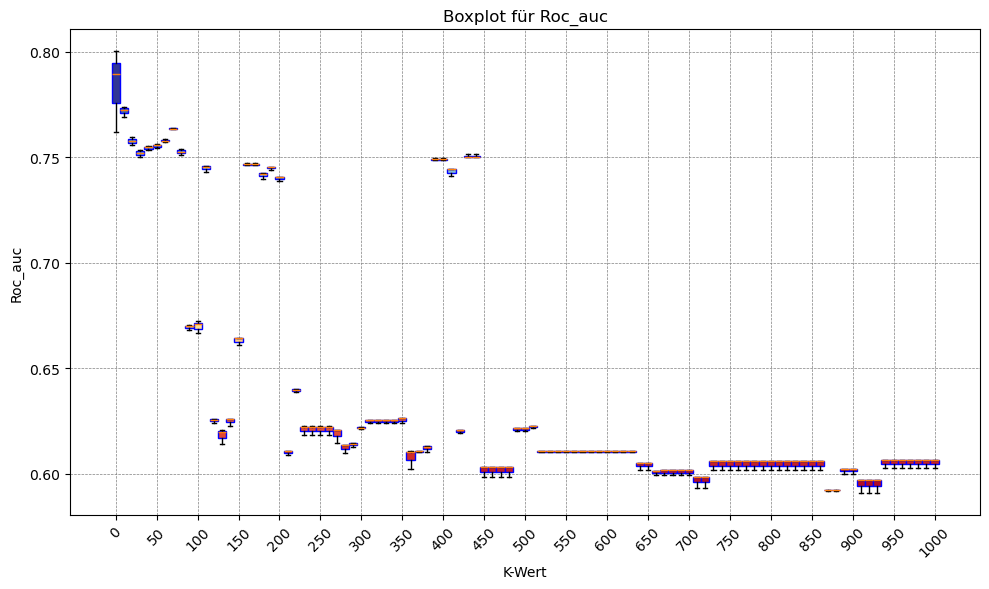

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# LaTeX-Unterstützung deaktivieren
plt.rcParams.update({
    "text.usetex": False  # Deaktiviere LaTeX
})

# Daten aus der CSV-Datei laden
df = pd.read_csv('C:/Users/leesh/Desktop/BA/Notebooks/results_summary/results_(m)_TD_1_to_1000_(30.07)//boxplot_data.csv')

# Spaltennamen anzeigen, um sicherzustellen, dass die Daten korrekt geladen wurden
print("Spaltennamen in der CSV-Datei:", df.columns)

# Liste der Metriken, die geplottet werden sollen
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

# Überprüfen, ob die Spalte 'metric' existiert
if 'metric' not in df.columns:
    print("Die Spalte 'metric' existiert nicht. Überprüfe den CSV-Dateiaufbau.")
else:
    # Erstelle Boxplots für jede Metrik
    for metric in metrics:
        # Filtere die Daten für die aktuelle Metrik
        subset = df[df['metric'] == metric]

        # Erstelle das Plot
        fig, ax = plt.subplots(figsize=(10, 6))

        # Liste der K-Werte
        k_values = sorted(subset['k'].unique())

        # Erstelle einen Boxplot für jeden K-Wert, aber füge die Daten aller Klassifikatoren zusammen
        boxplot_data = [subset[subset['k'] == k]['median'].values for k in k_values]

        # Berechne die Medians für die Farbgebung
        medians = [np.median(subset[subset['k'] == k]['median'].values) for k in k_values]

        # Verwende eine Farbreihe von Rot zu Blau, z.B. über 'RdYlBu' Colormap
        colormap = plt.colormaps['RdYlBu']  # Verwende die neue Syntax für Colormaps

        # Normalisiere die Medians auf den Wertebereich (min zu max)
        norm = plt.Normalize(vmin=min(medians), vmax=max(medians))

        # Zeichne die Boxplots (mit erhöhter Breite für bessere Sichtbarkeit)
        for i, data in enumerate(boxplot_data):
            box = ax.boxplot(
                data,
                positions=[k_values[i]],
                widths=10,  # Erhöhe die Breite der Boxplots für bessere Sichtbarkeit
                patch_artist=True,
                showfliers=False  # Ausreißer ausblenden
            )

            # Färbe die Boxen basierend auf den Medians
            color = colormap(norm(medians[i]))
            for patch in box['boxes']:
                patch.set_facecolor(color)
                patch.set_edgecolor('blue')

        # Hintergrundgitter hinzufügen
        ax.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)
        #ax.grid(visible=True, which='minor', color='lightgray', linestyle='--', linewidth=0.5)

        # Achsenbeschriftungen
        ax.set_xlabel('K-Wert')
        ax.set_ylabel(metric.capitalize())
        ax.set_title(f'Boxplot für {metric.capitalize()}')

        # Anordnung der X-Ticks (nur einige anzeigen)
        step = 5  # Kleinere Schrittweite, um mehr K-Werte anzuzeigen
        selected_k_values = k_values[::step]  # Beschränke die K-Werte auf regelmäßige Abstände

        # Setze die X-Ticks nur für die ausgewählten Positionen und beschrifte sie
        ax.set_xticks(selected_k_values)
        ax.set_xticklabels(selected_k_values, rotation=45)

        # Erstelle eine Colorbar
        #sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
        #sm.set_array([])  # Für den Fall, dass kein Array übergeben wird
        #cbar = plt.colorbar(sm, ax=ax, fraction=0.03)
        # cbar.set_label('Median Werte')
        #cbar.set_ticks(np.linspace(min(medians), max(medians), num=5))
        #cbar.ax.set_yticklabels([f"{round(tick, 2)}" for tick in np.linspace(min(medians), max(medians), num=5)])  # Formatierung der Tick-Labels

        # Layout anpassen und speichern
        plt.subplots_adjust(bottom=0.15)  # Genügend Platz für die X-Achsen-Beschriftungen
        plt.tight_layout()

        # Speichere das Bild
        plt.savefig(f"boxplot_{metric}.png")
        # plt.savefig(f"boxplot_{metric}.pgf")

        # Zeige das Diagramm an (optional)
        plt.show()
